<h1>LSTM with TIEDVD for B0006.</h1>

In [1]:
"""
Created on Mon Apr  10 09:02:14 2019

@author: khaled
"""
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout



Using TensorFlow backend.


In [40]:
import numpy as np # linear algebra
import pandas as pd
df=pd.read_csv("Discharge6_H1.csv")
featurs=['Batt_name','cycle','amb_temp','voltage_battery','current_battery','temp_battery','current_load','voltage_load','time','Capacity','H']
ftr=['cycle','Capacity']
df1=df[ftr]
test=df[(df['cycle']>=82)]
f1=['cycle','H']
df=df[featurs]

In [41]:
#test=test['Capacity']
print(df1.head())

   cycle  Capacity
0      1  2.035338
1      2  2.025140
2      3  2.013326
3      4  2.013285
4      5  2.000528


In [42]:
dataset=df[f1]
data_train=dataset[(dataset['cycle']<82)]
data_set_train=data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=82)]
data_set_test=data_test.iloc[:,1:2].values

In [43]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)

In [44]:
X_train=[]
y_train=[]
for i in range(10,81):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [59]:
#Start LSTM 
regress=Sequential()
regress.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
regress.add(Dropout(0.3))

regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))


regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))

regress.add(LSTM(units=200))
regress.add(Dropout(0.3))


regress.add(Dense(units=1))

regress.compile(optimizer='adam',loss='mean_squared_error')

regress.fit(X_train,y_train,epochs=200,batch_size=50)


Epoch 1/200
71/71 [==============================] - 6s 84ms/step - loss: 0.3227
Epoch 2/200
71/71 [==============================] - 0s 3ms/step - loss: 0.1512
Epoch 3/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0588
Epoch 4/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0277
Epoch 5/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0546
Epoch 6/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0554
Epoch 7/200
71/71 [==============================] - 0s 4ms/step - loss: 0.0257
Epoch 8/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0359
Epoch 9/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0261
Epoch 10/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0220
Epoch 11/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 12/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 13/200
71/71 [================

71/71 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 103/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 104/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 105/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 106/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 107/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 108/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 109/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 110/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 111/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 112/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 113/200
71/71 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 114/200
71/71 [=========

In [46]:
##### predictions
data_total=pd.concat((data_train['H'],data_test['H']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-10:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

X_test=[]
for i in range(10,97):
    X_test.append(inputs[i-10:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred=regress.predict(X_test)
pred=sc.inverse_transform(pred)
pred=pred[:,0]
tests=data_test.iloc[:,1:2]

In [47]:
fitting=df[ (df['cycle']>=82)]
fitting=fitting['Capacity']
abc=np.array(fitting)
## abc == Capacity
fitting=fitting.values
#test=per
cap=np.array(pred)
li=[]
z=np.polyfit(cap,abc,1)


In [48]:
z

array([6.55219062e-04, 6.81545173e-01])

In [50]:
li=[]
for i in range(len(abc)):
    xx=(cap[i] *0.000655219062) + 0.681545173
    li.append(xx)

In [51]:
per=test
#per['per']=pred

#per['per']=li
per['per']=li

In [52]:
rmse = np.sqrt(mean_squared_error(per['Capacity'],per['per']))
print('Test RMSE: %.3f' % rmse)
print("R^2 = " + str(metrics.r2_score(per['Capacity'],per['per'])))

Test RMSE: 0.031
R^2 = 0.9030958621946557


Text(0.5, 1.0, 'Discharge B0006')

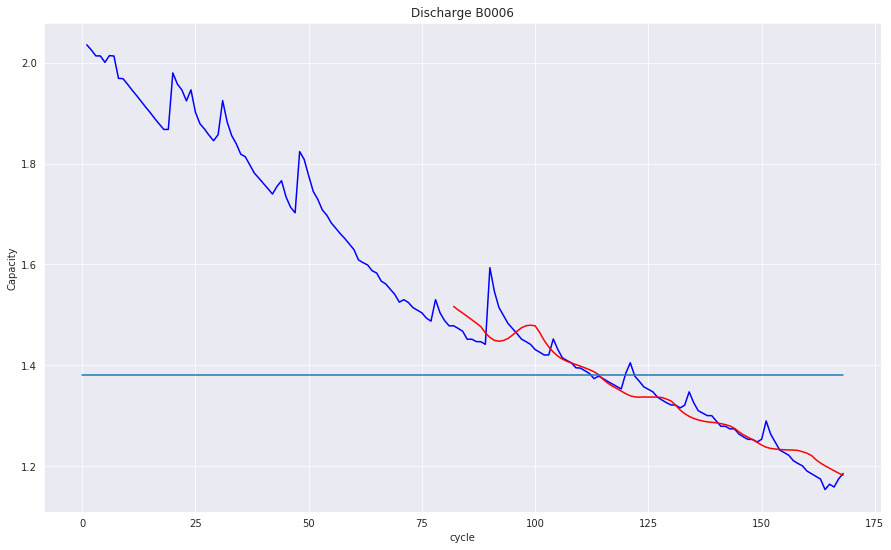

In [56]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = df1.loc[(df1['cycle']>=1),['cycle','Capacity']]
plot_per=per.loc[per['cycle']>=82,['cycle','per']]
sns.set_style("darkgrid")
plt.figure(figsize=(15, 9))
plt.plot(plot_df['cycle'], plot_df['Capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['per'],label="Prediction data", color='red')
#Draw threshold
plt.plot([0.,168], [1.38, 1.38])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0006')

In [54]:
actual=0
pred=0
Afil=0
Pfil=0
a=per['Capacity'].values
b=per['per'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<1.38:
        j=i
        Afil=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=k
        break
print("The Actual fail at cycle number: "+ str(Afil+81))
print("The prediction fail at cycle number: "+ str(Pfil+81))
    
        

The Actual fail at cycle number: 112
The prediction fail at cycle number: 114


In [55]:
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The error of RUL= 2 Cycle(s)
